## Linear Regression

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/CarPrice_Assignment.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## z-score normalization
is a statistical method used to transform data into a standard normal distribution. 

$$ Z=(X−μ)/σ $$

where, 

    - Z is the Z-score of the data point
    - X is the individual data point.
    - μ (mu) is the mean of the dataset.
    - σ (sigma) is the standard deviation of the dataset.

In [80]:
zScore = df[['horsepower', 'highwaympg', 'peakrpm', 'curbweight', 'wheelbase', 'stroke']]

mean_arr = []
std_arr = []
for column_name in zScore.columns :
  column = df[column_name]
  mean = column.mean()
  mean_arr.append(mean)
  std = column.std()
  std_arr.append(std)

print(mean_arr, std_arr)

for column_name in zScore.columns :
  column = df[column_name]
  mean = column.mean()
  std = column.std()
  arr = []
  for ele in column :
    val = (ele - mean)/std
    arr.append(val)

  df[column_name] = arr

[104.1170731707317, 30.75121951219512, 5125.121951219512, 2555.5658536585365, 98.75658536585367, 3.255414634146341] [39.54416680936116, 6.886443130941824, 476.98564305694634, 520.6802035016387, 6.021775685025571, 0.31359701376080407]


In [81]:
features = df[['horsepower', 'highwaympg', 'peakrpm', 'curbweight', 'wheelbase', 'stroke']]
X_train = np.array(features) # Z score normalization
print(X_train)
Y_train = np.array(df['price'])

[[ 0.17405669 -0.54472526 -0.26231807 -0.01453071 -1.68664293 -1.83488557]
 [ 0.17405669 -0.54472526 -0.26231807 -0.01453071 -1.68664293 -1.83488557]
 [ 1.26144842 -0.6899381  -0.26231807  0.51362457 -0.70686548  0.68427108]
 ...
 [ 0.75568483 -1.12557664  0.78593151  0.87661129  1.71766854 -1.22901245]
 [ 0.04761579 -0.54472526 -0.6816179   1.27032705  1.71766854  0.46105466]
 [ 0.24992123 -0.83515095  0.5762816   0.97263953  1.71766854 -0.3361468 ]]


### Linear Model

- The model function for linear regression, which is a function that maps from `x` to `y` is represented as 
    $$f_{w,b}(x) = wx + b$$

In [82]:
def predict(w,b,x_i) :
  res = np.dot(w,x_i)+b
  return res

### Cost Function

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.

In [83]:
def cost(w,b,x) :
  m = X_train.shape[0]
  netSqrErr = 0
  for i in range(m) :
    error = predict(w,b,x[i]) - Y_train[i]
    netSqrErr += error**2
  return netSqrErr/(2*m)

### Gradient Descent

- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.

  $$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
  \newline & \rbrace\end{align*}$$

  where, parameters $w, b$ are both updated simultaniously and where  
  $$
  \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
  $$
  $$
  \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
  $$


In [84]:
def derivative(w,b,x) :
  m,n = X_train.shape
  dj_dw, dj_db = np.zeros(n), 0
  for i in range(m) :
    error = predict(w,b,x[i]) - Y_train[i]
    dj_dw += error*x[i]
    dj_db += error

  return dj_dw/m , dj_db/m

In [88]:
def gradientDescent(w,b,x,alpha,itr) :
  w_copy = w
  b_copy = b
  J_history = []
  for i in range(itr) :
    dj_dw, dj_db = derivative(w_copy,b_copy,x)
    b_copy = b_copy - alpha * dj_db
    w_copy = w_copy - alpha * dj_dw

    if i<100000:
        J_history.append(cost(w_copy,b_copy,x))

    if i%1000 == 0:
      print(f"Iteration {i}: Cost {J_history[-1]}")

  return w_copy, b_copy, J_history

Iteration 0: Cost 119576676.61975761
Iteration 1000: Cost 20184002.905426748
Iteration 2000: Cost 9349544.1222001
Iteration 3000: Cost 7666973.732660869
Iteration 4000: Cost 7291476.17419364
Iteration 5000: Cost 7141718.560330776
Iteration 6000: Cost 7054299.767115058
Iteration 7000: Cost 6996329.069612974
Iteration 8000: Cost 6956428.488908239
Iteration 9000: Cost 6928519.120543207
Iteration 10000: Cost 6908759.737823729
Iteration 11000: Cost 6894601.626321946
Iteration 12000: Cost 6884325.389552277
Iteration 13000: Cost 6876761.355761786
Iteration 14000: Cost 6871108.990231908
Iteration 15000: Cost 6866817.397181235
Iteration 16000: Cost 6863505.337458383
Iteration 17000: Cost 6860907.333305379
Iteration 18000: Cost 6858837.18749511
Iteration 19000: Cost 6857163.207773018
Iteration 20000: Cost 6855791.334931478
Iteration 21000: Cost 6854653.624278411
Iteration 22000: Cost 6853700.361498034
Iteration 23000: Cost 6852894.650485858
Iteration 24000: Cost 6852208.685381328
Iteration 25000

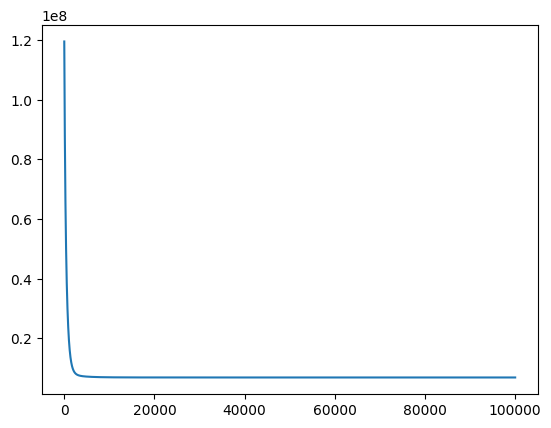

In [89]:
# main execution code
w_init = np.zeros(6)
b_init = 0.0
iterations = 100000
alpha = 1e-3

w_final, b_final, J_hist = gradientDescent(w_init, b_init, X_train, alpha, iterations)

print(w_final, b_final)
plt.plot(J_hist)
plt.show()

### Prediction

In [90]:
X_predict = [[ 0.179, -0.547, -0.223, -0.014, -1.86, -1.34], [ 0.140, -0.546, -0.889, -0.1109, -1.27, -1.83], [ 1.261, 0.6891,  0.2623, 0.5137, -0.70,  0.6999]]

for ele in X_predict :
  features, prediction = [], 0
  for i in range(len(ele)) :
    val = ele[i]
    features.append(val*std_arr[i]+mean_arr[i])

  prediction = predict(w_final, b_final, ele)
  print(f'for given input {features} the prediction is {prediction}')


for given input [111.19547902960734, 26.98433511956994, 5018.754152817813, 2548.2763308095136, 87.5560825917061, 2.835194635706863] the prediction is 12318.719811210462
for given input [109.65325652404226, 26.991221562700886, 4701.081714541887, 2497.8224190902047, 91.10893024587119, 2.681532098964069] the prediction is 12264.690914996647
for given input [153.9822675173361, 35.49666747372713, 5250.235285393349, 2823.0392741973283, 94.54134238633577, 3.4749011840775275] the prediction is 20657.125849951804


alpha = 1e-3 and iterations = 5000
1. the prediction is 12415.25353799652
2. the prediction is 12764.76158162869
3. the prediction is 18378.849081898843

alpha = 1e-3 and iterations = 100000
1. the prediction is 12318.719811210462
2. the prediction is 12264.690914996647
3. the prediction is 20657.125849951804